In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [ ]:
# Define the path to the Excel file
file_path = r'C:\Users\Admin\Downloads\Text Sentiment Analysis Datasets\twitter_training.xlsx'

# Optional: Check files in the folder to confirm the file name
print("Files in folder:")
print(os.listdir(r'C:\Users\Admin\Downloads\Text Sentiment Analysis Datasets'))

# Load the Excel file
df = pd.read_excel(file_path, engine='openpyxl')  # Use 'openpyxl' for .xlsx

# Show the first few rows
print(df.head(74600))

Files in folder:
['twitter_training.xlsx', 'twitter_validation.xlsx']
         ID          LOC     Label  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74595  9186       Nvidia  Positive   
74596  9186       Nvidia  Positive   
74597  9186       Nvidia  Positive   
74598  9187       Nvidia  Positive   
74599  9187       Nvidia  Positive   

                                                    text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74595  RhandlerR HOLY SHIT these prices are so much l...  
7

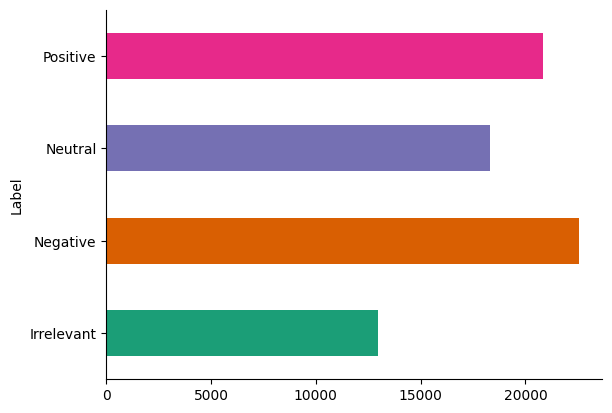

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split

texts = df['text'].values
labels = df['Label'].values

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, labels, test_size=0.3, random_state=42)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [ ]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [ ]:
train_labels_cat = to_categorical(train_labels_encoded)
val_labels_cat = to_categorical(val_labels_encoded)
test_labels_cat = to_categorical(test_labels_encoded)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


tokenizer = Tokenizer()
train_texts = [str(text) for text in train_texts]
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

train_sequences = tokenizer.texts_to_sequences(train_texts)

val_texts = np.nan_to_num(val_texts, nan="", posinf="", neginf="")
val_texts = [str(text) for text in val_texts]
val_sequences = tokenizer.texts_to_sequences(val_texts)

test_texts = np.nan_to_num(test_texts, nan="", posinf="", neginf="")
test_texts = [str(text) for text in test_texts]
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_length)
val_data = pad_sequences(val_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

from tensorflow.keras.layers import Embedding

embedding_dim = 128
embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_length)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

vocab_size = len(tokenizer.word_index) + 1

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(train_labels_cat.shape[1], activation='softmax')
])
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

vocab_size = len(tokenizer.word_index) + 1

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(train_labels_cat.shape[1], activation='softmax')
])

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)


num_classes = len(label_encoder.classes_)

train_labels_cat = to_categorical(train_labels_encoded, num_classes=num_classes)
val_labels_cat = to_categorical(val_labels_encoded, num_classes=num_classes)
test_labels_cat = to_categorical(test_labels_encoded, num_classes=num_classes)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, train_labels_cat, epochs=19, validation_data=(val_data, val_labels_cat))

Epoch 1/19
1634/1634 [==============================] - 46s 24ms/step - loss: 1.2359 - accuracy: 0.4487 - val_loss: 1.0344 - val_accuracy: 0.5823
Epoch 2/19
1634/1634 [==============================] - 41s 25ms/step - loss: 0.8911 - accuracy: 0.6483 - val_loss: 0.7949 - val_accuracy: 0.6924
Epoch 3/19
1634/1634 [==============================] - 41s 25ms/step - loss: 0.6376 - accuracy: 0.7674 - val_loss: 0.6687 - val_accuracy: 0.7442
Epoch 4/19
1634/1634 [==============================] - 42s 26ms/step - loss: 0.4692 - accuracy: 0.8337 - val_loss: 0.5185 - val_accuracy: 0.8112
Epoch 5/19
1634/1634 [==============================] - 37s 22ms/step - loss: 0.3670 - accuracy: 0.8687 - val_loss: 0.4579 - val_accuracy: 0.8327
Epoch 6/19
1634/1634 [==============================] - 35s 21ms/step - loss: 0.3038 - accuracy: 0.8901 - val_loss: 0.4174 - val_accuracy: 0.8464
Epoch 7/19
1634/1634 [==============================] - 27s 17ms/step - loss: 0.2600 - accuracy: 0.9057 - val_loss: 0.3978 -

In [ ]:
final_train_acc = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")

Final Training Accuracy: 0.9457


In [ ]:
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Validation Accuracy: 0.8650


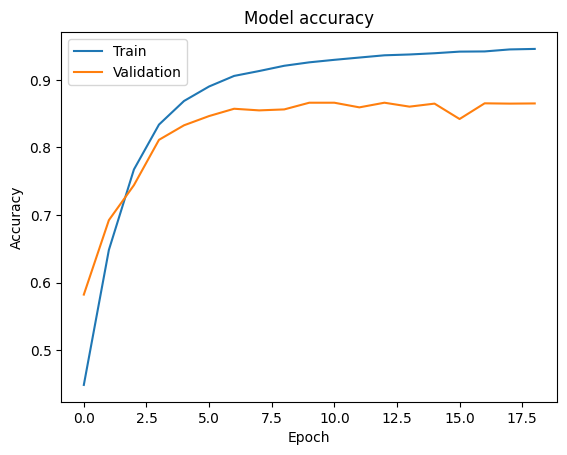

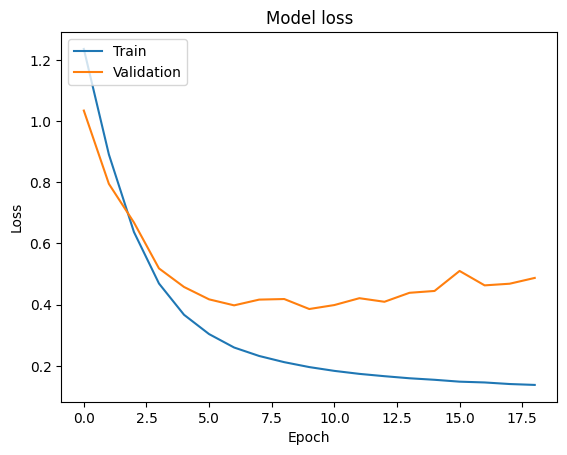

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

testing

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_probs = model.predict(test_data)
y_pred = y_pred_probs.argmax(axis=1)

test_labels_numerical = label_encoder.transform(test_labels)

print("Test Accuracy:", accuracy_score(test_labels_numerical, y_pred))

351/351 [==============================] - 1s 3ms/step
Test Accuracy: 0.8541462108363831


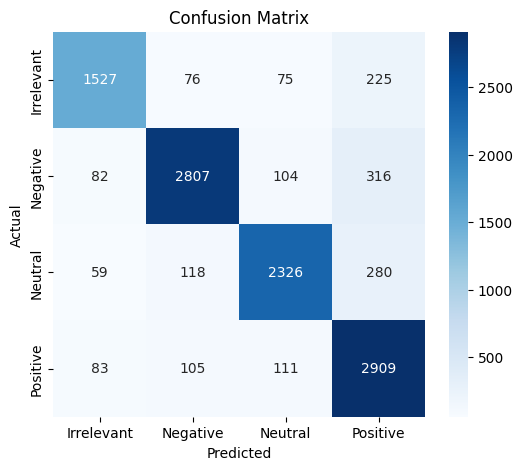

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_labels_encoded = label_encoder.transform(test_labels)

cm = confusion_matrix(test_labels_encoded, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

test_labels_encoded = label_encoder.transform(test_labels)
y_pred = np.array(y_pred)
unique_labels = np.unique(np.concatenate([test_labels_encoded, y_pred]))
class_names = [label_encoder.classes_[i] for i in unique_labels]

report = classification_report(test_labels_encoded, y_pred, labels=unique_labels, target_names=class_names)
report_lines = report.splitlines()
filtered_report = "\n".join([line for line in report_lines if "accuracy" not in line.lower()])

print(filtered_report)

              precision    recall  f1-score   support

  Irrelevant       0.87      0.80      0.84      1903
    Negative       0.90      0.85      0.88      3309
     Neutral       0.89      0.84      0.86      2783
    Positive       0.78      0.91      0.84      3208

   macro avg       0.86      0.85      0.85     11203
weighted avg       0.86      0.85      0.85     11203


save and load the model

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("text_sentiment_model.h5")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           501200    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 501876 (1.91 MB)
Trainable params: 501876 (1.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


predictions

In [ ]:
# Example sentence(s) already provided in the code
sentences = [
    "I'm so happy with the results!",
    "This is the worst experience I've ever had.",
    "I don't feel strongly about it either way.",
    "Absolutely fantastic product and service!",
    "Totally disappointed, waste of time."
]

# Prediction function
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=100)  # same max_length used during training
    prediction = model.predict(padded)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    confidence = np.max(prediction)
    return predicted_label, confidence

# Predict sentiment for each sentence
for text in sentences:
    sentiment, confidence = predict_sentiment(text)
    print(f"\nText: {text}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")


1/1 [==============================] - 0s 55ms/step

Text: I'm so happy with the results!
Predicted Sentiment: Positive (Confidence: 0.92)
1/1 [==============================] - 0s 55ms/step

Text: This is the worst experience I've ever had.
Predicted Sentiment: Negative (Confidence: 0.60)
1/1 [==============================] - 0s 55ms/step

Text: I don't feel strongly about it either way.
Predicted Sentiment: Positive (Confidence: 0.98)
1/1 [==============================] - 0s 51ms/step

Text: Absolutely fantastic product and service!
Predicted Sentiment: Positive (Confidence: 0.83)
1/1 [==============================] - 0s 55ms/step

Text: Totally disappointed, waste of time.
Predicted Sentiment: Negative (Confidence: 1.00)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import load_model
import pickle

# Load saved model and supporting objects
model = load_model("text_sentiment_model.h5")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# Set max_length same as used during training
max_length = 100

# Function to preprocess and predict sentiment
def predict_sentiment(text):
    text_seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(text_seq, maxlen=max_length)
    prediction = model.predict(padded)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    confidence = np.max(prediction)
    return predicted_label, confidence

# Real-time input loop
while True:
    user_input = input("\nEnter a sentence to predict sentiment (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting real-time sentiment predictor.")
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")
